In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [3]:
df = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")

In [4]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [8]:
df["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [9]:
df["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df = df.drop(columns=["index","flight"],axis=1)

In [11]:
df["price"].value_counts

<bound method IndexOpsMixin.value_counts of 0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

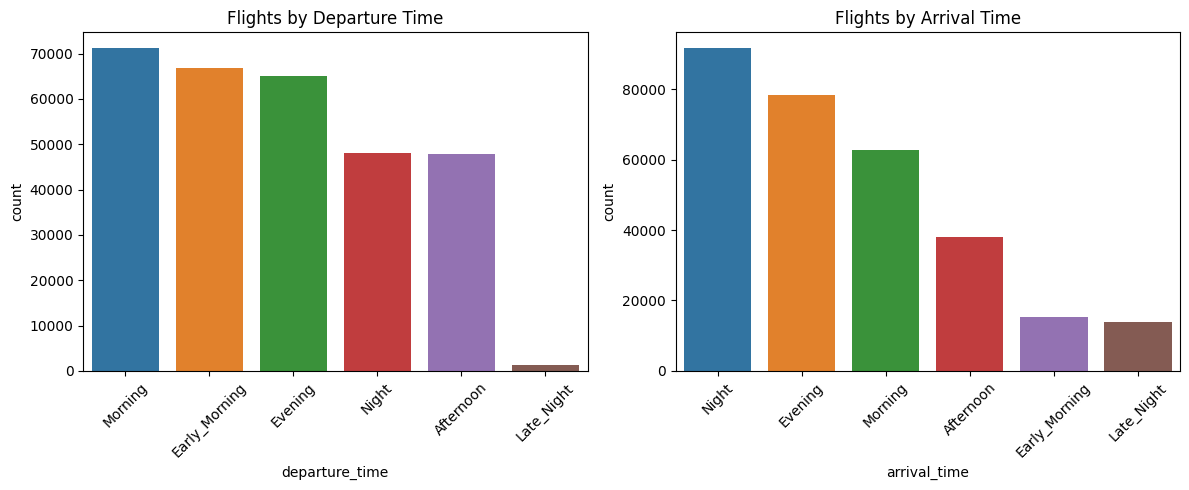

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='departure_time', data=df, order=df['departure_time'].value_counts().index)
plt.title("Flights by Departure Time")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='arrival_time', data=df, order=df['arrival_time'].value_counts().index)
plt.title("Flights by Arrival Time")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


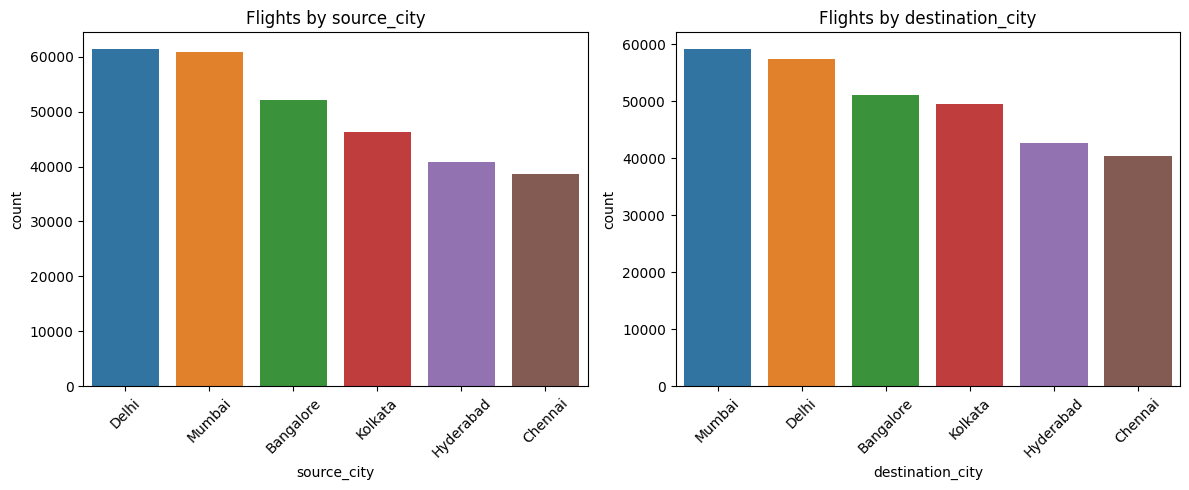

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='source_city', data=df, order=df['source_city'].value_counts().index)
plt.title("Flights by source_city")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='destination_city', data=df, order=df['destination_city'].value_counts().index)
plt.title("Flights by destination_city")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


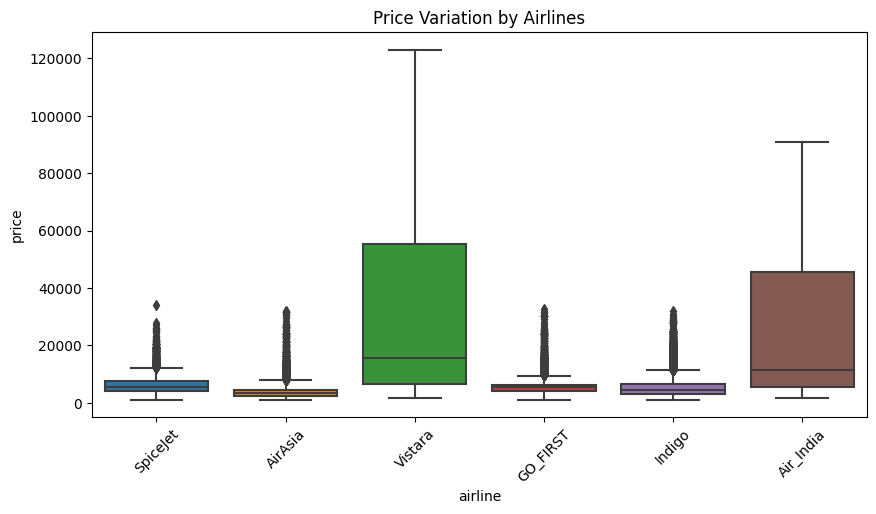

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='airline', y='price', data=df)
plt.title("Price Variation by Airlines")
plt.xticks(rotation=45)
plt.show()


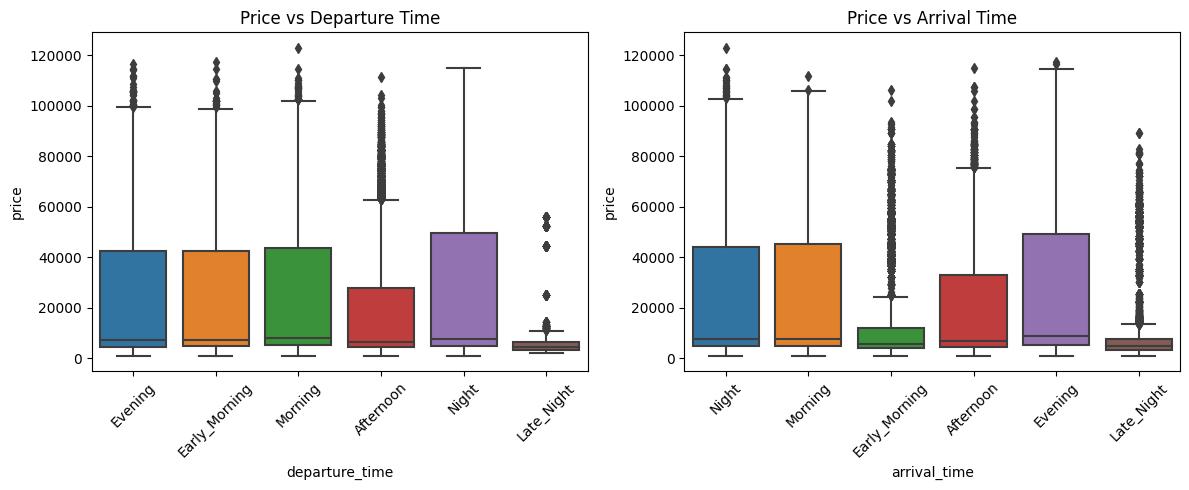

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time', y='price', data=df)
plt.title("Price vs Departure Time")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(x='arrival_time', y='price', data=df)
plt.title("Price vs Arrival Time")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np

standard_scaler = StandardScaler()
y_scaled = standard_scaler.fit_transform(np.array(y).reshape(-1, 1))



In [ ]:
x.head()

In [ ]:
x["duration"].value_counts()

In [ ]:
x_train.head()

In [22]:

transformer = ColumnTransformer(
    transformers=[
        ("trf", OneHotEncoder(sparse_output=False, drop="first"), ["airline","source_city","departure_time","stops","arrival_time","destination_city","class"]),
        ("trf1",MinMaxScaler(),["duration","days_left"])
    ],
    remainder="passthrough"
)

In [23]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [24]:
x_train_transformed.shape

(240122, 30)

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2025-08-12 17:15:01.533236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755018901.557406    1622 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755018901.563905    1622 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim = 30))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-12 17:15:06.637463: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',loss='mse',metrics=["mae","mse","r2_score"])

In [29]:
history = model.fit(x_train_transformed,y_train, validation_data=(x_test_transformed,y_test), epochs=50)

Epoch 1/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 217142464.0000 - mae: 8624.1377 - mse: 217142464.0000 - r2_score: 0.5757 - val_loss: 28256104.0000 - val_mae: 3177.4075 - val_mse: 28256104.0000 - val_r2_score: 0.9452
Epoch 2/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 27091250.0000 - mae: 3095.4062 - mse: 27091250.0000 - r2_score: 0.9474 - val_loss: 25270038.0000 - val_mae: 2962.9119 - val_mse: 25270038.0000 - val_r2_score: 0.9510
Epoch 3/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 23965030.0000 - mae: 2889.8389 - mse: 23965030.0000 - r2_score: 0.9535 - val_loss: 22378462.0000 - val_mae: 2783.1987 - val_mse: 22378462.0000 - val_r2_score: 0.9566
Epoch 4/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 21630880.0000 - mae: 2724.7791 - mse: 21630880.0000 - r2_score: 0.9581 - val_loss: 21012260.0000 - val_mae: 2689.1985 - val_mse: 21012260.0000 - val_r2_score: 0.9592
Epoch 5/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 19997074.0000 - mae

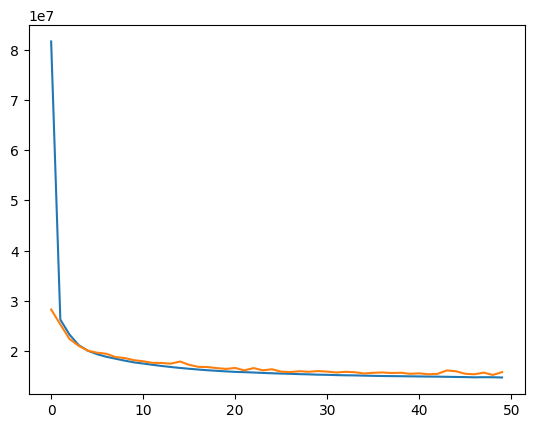

In [30]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

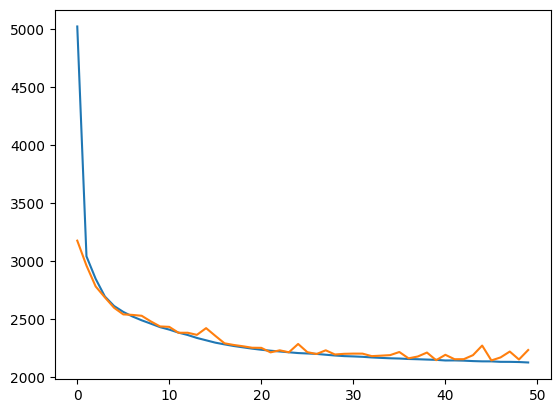

In [31]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])

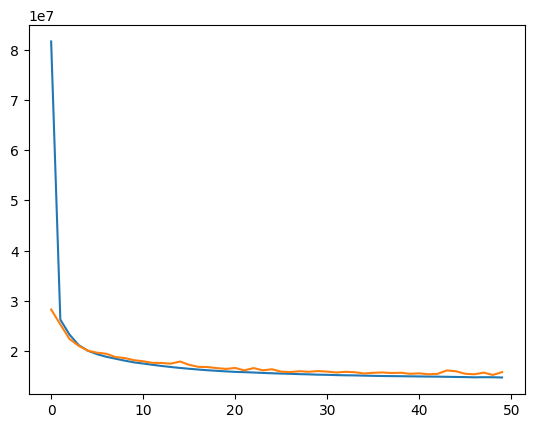

In [32]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])

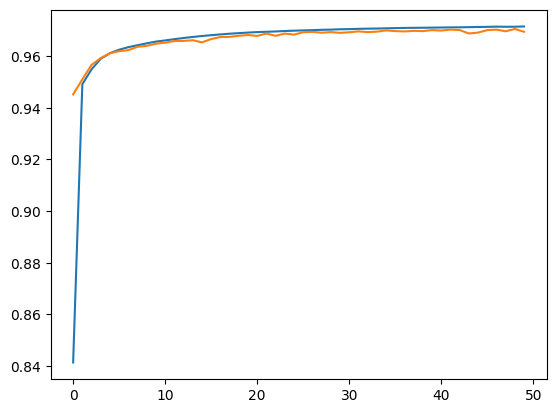

In [33]:
plt.plot(history.history["r2_score"])
plt.plot(history.history["val_r2_score"])